In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

## Qustion 11

#### Check DQN Implementation (Against Opt(0.5))

In [36]:
Turns = np.array(['X','O'])

player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env1 = DQNlearningEnv(player1=player1, player2=player2)
env1.train(20000)

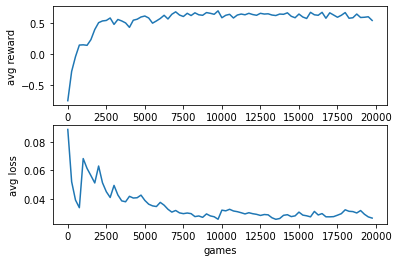

In [3]:
import matplotlib.pyplot as plt
length1=250
lst1 = env1.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)

avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,1)
plt.plot(list(x_ticks), avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

lst2 = env1.losses
x_ticks2 = range(0, len(lst2), length1)

avg_loss = []
for i in range(len(lst2)//length1):
    avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,2)
plt.plot(list(x_ticks2), avg_loss)
plt.xlabel(f'games')
plt.ylabel('avg loss')

# plt.savefig('./img/q11.png')



#### Compute average loss and reward with serveral fixed epsilons

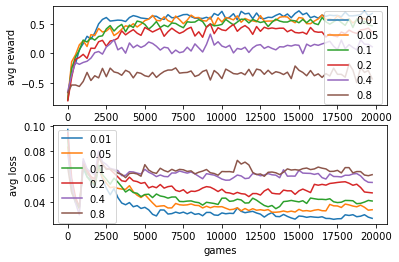

In [30]:
Turns = np.array(['X','O'])
length1=250
epsilon_list = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
# epsilon_list = [0.01, 0.05]
for e in range(len(epsilon_list)):
    player1 = DQNPlayer(epsilon=epsilon_list[e], player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env1 = DQNlearningEnv(player1=player1, player2=player2)
    env1.train(20000)

    length1=250
    lst1 = env1.get_reward(player=1)
    x_ticks = range(0, len(lst1), length1)

    avg_reward1 = []
    for i in range(len(lst1)//length1):
        avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

    plt.subplot(2,1,1)
    plt.plot(list(x_ticks), avg_reward1, label= str(epsilon_list[e]))
    plt.xlabel(f'games')
    plt.ylabel('avg reward')
    plt.legend()

    lst2 = env1.losses
    x_ticks2 = range(0, len(lst2), length1)

    avg_loss = []
    for i in range(len(lst2)//length1):
        avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

    plt.subplot(2,1,2)
    plt.plot(list(x_ticks2), avg_loss, label= str(epsilon_list[e]))
    plt.xlabel(f'games')
    plt.ylabel('avg loss')
    plt.legend()

plt.savefig("./img/q11_multi.png")


#### Compute Mrand and Mopt with several fixed epsilons

In [34]:
# For compute Mrand and Mopt
Turns = np.array(['X','O'])
test_reward_lists_random_1 = []
test_reward_lists_optimal_1 = []

for e in range(len(epsilon_list)):
    player1 = DQNPlayer(epsilon=epsilon_list[e], player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env1 = DQNlearningEnv(player1=player1, player2=player2)
    env1.set_testing()
    env1.train(20000)
    test_reward_lists_random_1.append(env1.test_avg_reward['random'])
    test_reward_lists_optimal_1.append(env1.test_avg_reward['optimal'])
    

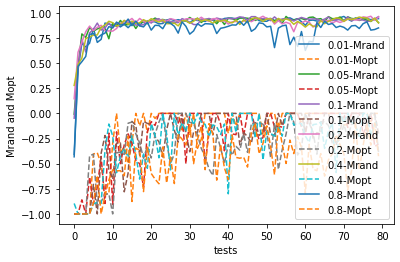

In [35]:

for j in range(len(epsilon_list)):
    plt.plot(test_reward_lists_random_1[j], label= str(epsilon_list[j]) + str("-Mrand"))
    plt.plot(test_reward_lists_optimal_1[j], label= str(epsilon_list[j]) + str("-Mopt"), linestyle="--")
plt.xlabel(f'tests')
plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q13_fixed_multi.png")

## Question 12

In [4]:
Turns = np.array(['X','O'])
player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env2 = DQNlearningEnv(player1=player1, player2=player2)
env2.set_batch_one()
env2.train(20000)

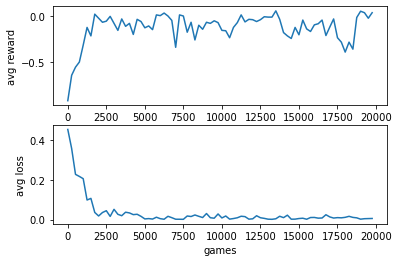

In [5]:
import matplotlib.pyplot as plt
length1=250
lst1 = env2.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)

avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

lst2 = env2.losses
x_ticks2 = range(0, len(lst2), length1)

avg_loss = []
for i in range(len(lst2)//length1):
    avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,1)
plt.plot(list(x_ticks), avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

plt.subplot(2,1,2)
plt.plot(list(x_ticks2), avg_loss)
plt.xlabel(f'games')
plt.ylabel('avg loss')

plt.savefig('./img/q12.png')

## Question 13

In [6]:
Turns = np.array(['X','O'])
test_reward_lists_random_3 = []
test_reward_lists_optimal_3 = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
# epoch_stars = [1]
for epoch_star in epoch_stars:
    player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = DQNlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_3.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_3.append(env3.test_avg_reward['optimal'])

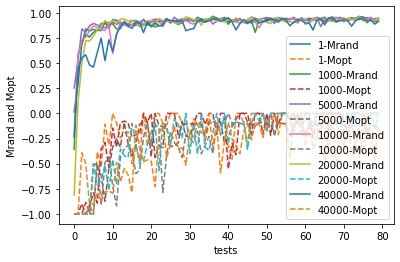

In [13]:
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_random_3[j], label= str(epoch_stars[j]) + str("-Mrand"))
    plt.plot(test_reward_lists_optimal_3[j], label= str(epoch_stars[j]) + str("-Mopt"), linestyle="--")
plt.xlabel(f'tests')
plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q13.jpg")